In [1]:
import pandas as pd

# https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

# Conectar a Google Drive y cargar dataset
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/Talento Tech/2_Experiencia/Unidad_3/IMDB_Dataset.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe
display(df.head())

Mounted at /content/drive


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
# Parameters
vocab_size = 1000
max_length = 120
embedding_dim = 16
trunc_type = 'post'
oov_tok = "OOV"

In [4]:
# Build the model
import keras

model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.LSTM(32),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
# Setup the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare the training and testing data
sentences = df['review'].tolist()
labels = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).tolist()

# Tokenize the sentences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

# Create sequences
sequences = tokenizer.texts_to_sequences(sentences)

# Pad the sequences
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

# Split data into training and testing sets
training_size = int(len(sentences) * 0.8)

training_sentences = padded[0:training_size]
testing_sentences = padded[training_size:]
training_labels = labels[0:training_size]
test_labels = labels[training_size:]

# Convert lists to numpy arrays
import numpy as np

training_sentences = np.array(training_sentences)
training_labels = np.array(training_labels)
testing_sentences = np.array(testing_sentences)
test_labels = np.array(test_labels)

In [9]:
from sklearn.model_selection import train_test_split
review = df['review'].tolist()
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.20, random_state=42)

In [13]:
import tensorflow as tf

training_sentences = tf.convert_to_tensor(training_sentences, dtype=tf.int32)
testing_sentences = tf.convert_to_tensor(testing_sentences, dtype=tf.int32)
training_labels = tf.convert_to_tensor(training_labels, dtype=tf.int32)
test_labels = tf.convert_to_tensor(test_labels, dtype=tf.int32)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 119s 93ms/step - accuracy: 0.7555 - loss: 0.5193 - val_accuracy: 0.5008 - val_loss: 1.1141
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 92ms/step - accuracy: 0.7860 - loss: 0.4732 - val_accuracy: 0.5010 - val_loss: 1.0819
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.8125 - loss: 0.4147 - val_accuracy: 0.5031 - val_loss: 1.0658
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 146s 93ms/step - accuracy: 0.8146 - loss: 0.4095 - val_accuracy: 0.4996 - val_loss: 0.9644
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 137s 89ms/step - accuracy: 0.8026 - loss: 0.4340 - val_accuracy: 0.5008 - val_loss: 1.1786
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 109s 88ms/step - accuracy: 0.8245 - loss: 0.3860 - val_accuracy: 0.5008 - val_loss: 1.2659
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 89ms/step - accuracy: 0.8362 - loss: 0.3638 - val_accuracy: 0.5016 - val_loss: 1.2234
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 87ms/step - accuracy: 

<Axes: >

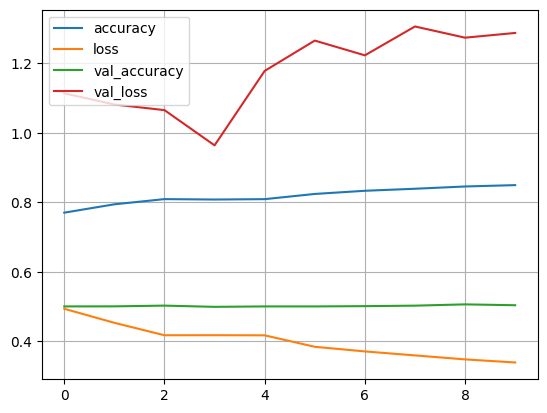

In [14]:
num_epochs = 10
# Train the model
history = model.fit(training_sentences, training_labels, epochs=num_epochs, validation_data=(testing_sentences, test_labels))

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(testing_sentences, test_labels)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")